SKLearn toy datasets...

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
cancer_ds = datasets.load_breast_cancer(return_X_y=False, as_frame=True)
dir(cancer_ds)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print(cancer_ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(cancer_ds.target_names)
print(cancer_ds.target.shape)
print("Number of benign cases: ", np.sum(cancer_ds.target == 1), "/", cancer_ds.target.shape[0])

['malignant' 'benign']
(569,)
Number of benign cases:  357 / 569


In [5]:
print("Feature Names:")
for feature_name in cancer_ds.feature_names:
    print(f"\t{feature_name}")

Feature Names:
	mean radius
	mean texture
	mean perimeter
	mean area
	mean smoothness
	mean compactness
	mean concavity
	mean concave points
	mean symmetry
	mean fractal dimension
	radius error
	texture error
	perimeter error
	area error
	smoothness error
	compactness error
	concavity error
	concave points error
	symmetry error
	fractal dimension error
	worst radius
	worst texture
	worst perimeter
	worst area
	worst smoothness
	worst compactness
	worst concavity
	worst concave points
	worst symmetry
	worst fractal dimension


In [6]:
display(cancer_ds.data.sample(10))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
453,14.530,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.14780,0.13730,0.10690,0.2606,0.07810
544,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,15.05,24.75,99.17,688.6,0.1264,0.20370,0.13770,0.06845,0.2249,0.08492
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.33,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
480,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.1208,0.22790,0.16200,0.05690,0.2406,0.07729
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623
261,17.350,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,...,19.85,31.47,128.20,1218.0,0.1240,0.14860,0.12110,0.08235,0.2452,0.06515


In [7]:
cancer_ds.data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


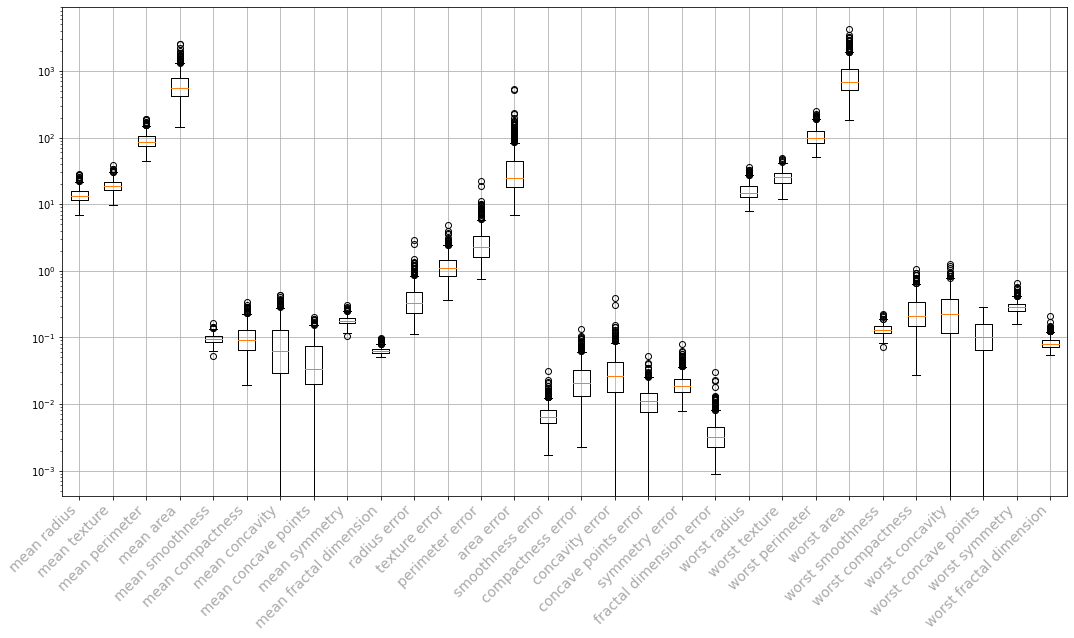

In [8]:
fig = plt.figure(figsize=(18., 9.))
plt.boxplot(cancer_ds.data.to_numpy())
column_names = cancer_ds.data.columns
_ticks = 1 + np.arange(len(column_names))
plt.xticks(_ticks, column_names, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.grid()
plt.gca().set_axisbelow(True)
plt.yscale("log")
plt.show()

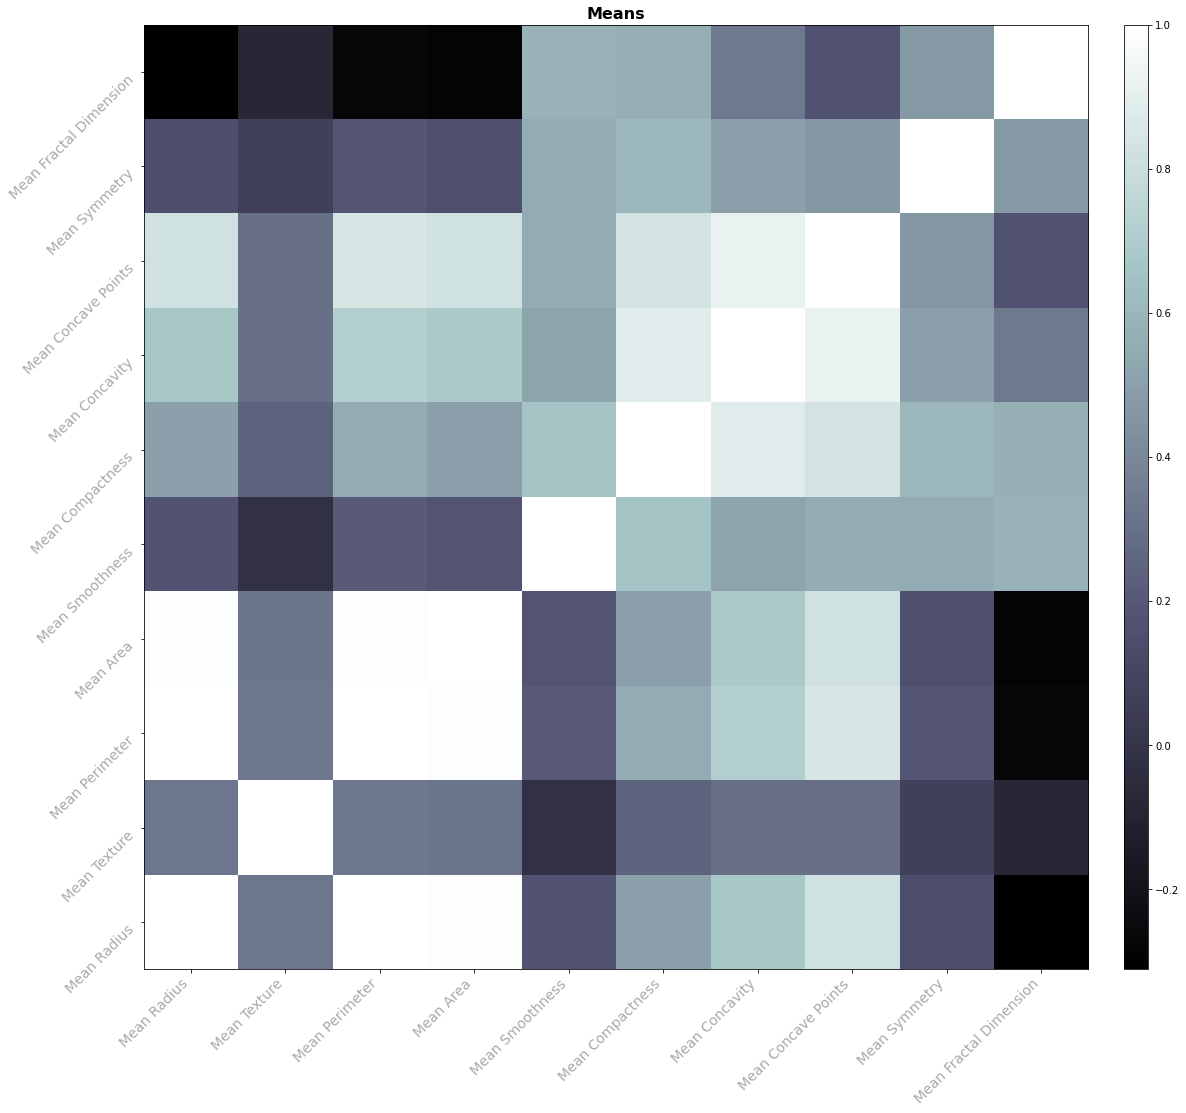

In [9]:
columns = list(filter(lambda x: x.find("error") == -1 and x.find("worst") == -1, cancer_ds.data.columns))
filtered_mean_df = cancer_ds.data.filter(items=columns, axis=1)
corr_mat = filtered_mean_df.corr()

_ticks = np.arange(corr_mat.shape[0])
_labels = [name.title() for name in columns]

fig = plt.figure(figsize=(18., 18.))
#
plt.title("Means", fontsize=16, fontweight="bold")
im = plt.imshow(corr_mat, cmap="bone", origin="lower")
plt.xticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.yticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="2.5%", pad=0.5)
plt.colorbar(im, cax=cax)
#
plt.show()

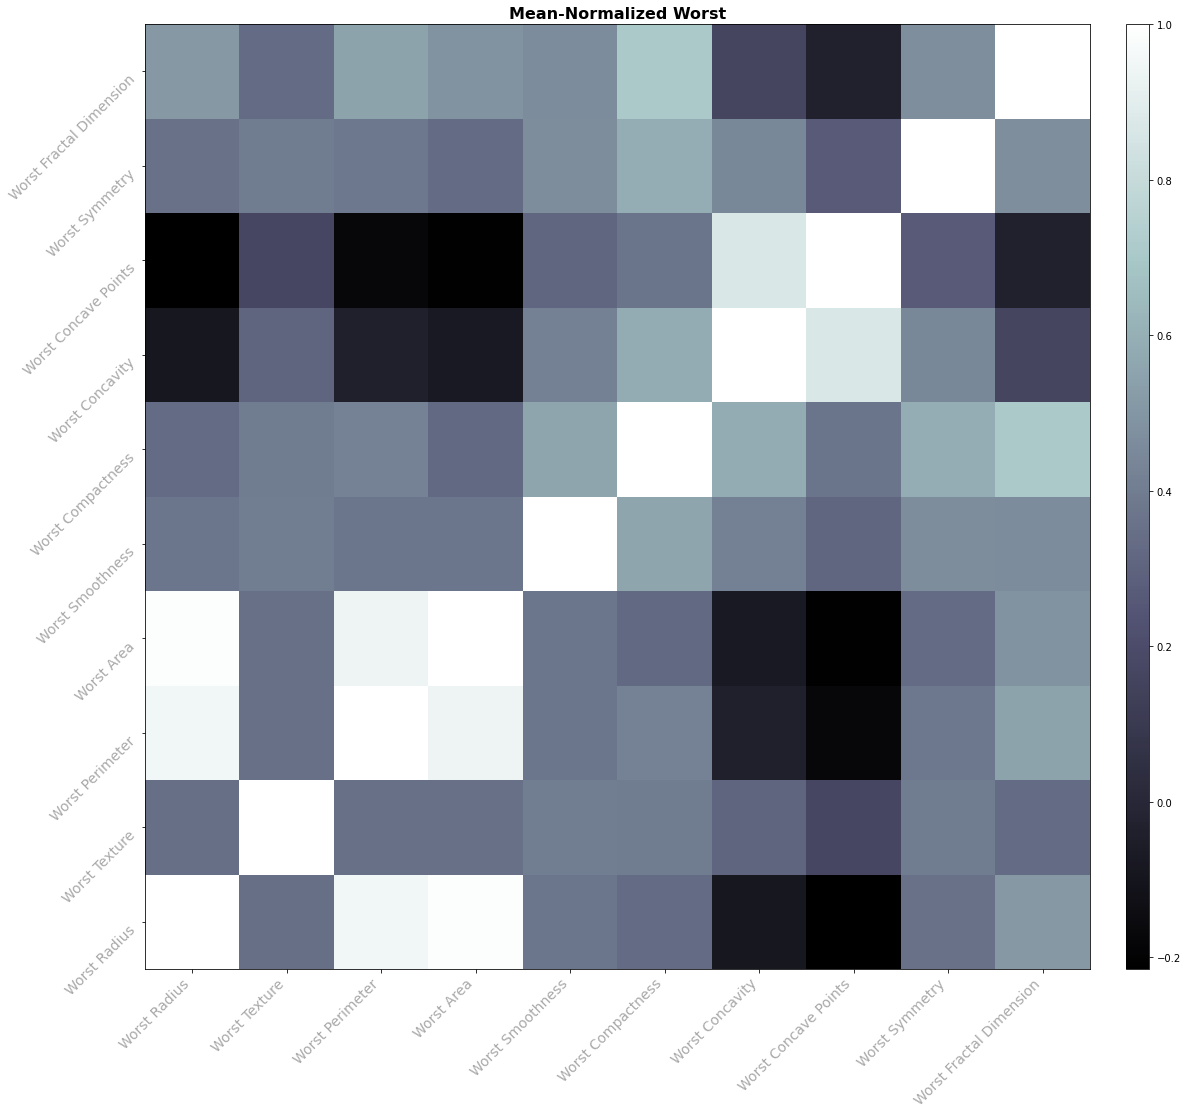

In [10]:
columns = list(filter(lambda x: x.find("worst") != -1, cancer_ds.data.columns))
filtered_df = cancer_ds.data.copy()
mean_columns = [x.replace("worst", "mean") for x in columns]
# display(filtered_df[columns].describe())
for w, m in zip(columns, filtered_df):
    filtered_df[w] = filtered_df[w] / filtered_df[m]
# display(filtered_df[columns].describe())
filtered_df = filtered_df.filter(items=columns, axis=1)
corr_mat = filtered_df.corr()

_ticks = np.arange(corr_mat.shape[0])
_labels = [name.title() for name in columns]

fig = plt.figure(figsize=(18., 18.))
#
plt.title("Mean-Normalized Worst", fontsize=16, fontweight="bold")
im = plt.imshow(corr_mat, cmap="bone", origin="lower")
plt.xticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.yticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="2.5%", pad=0.5)
plt.colorbar(im, cax=cax)
#
plt.show()

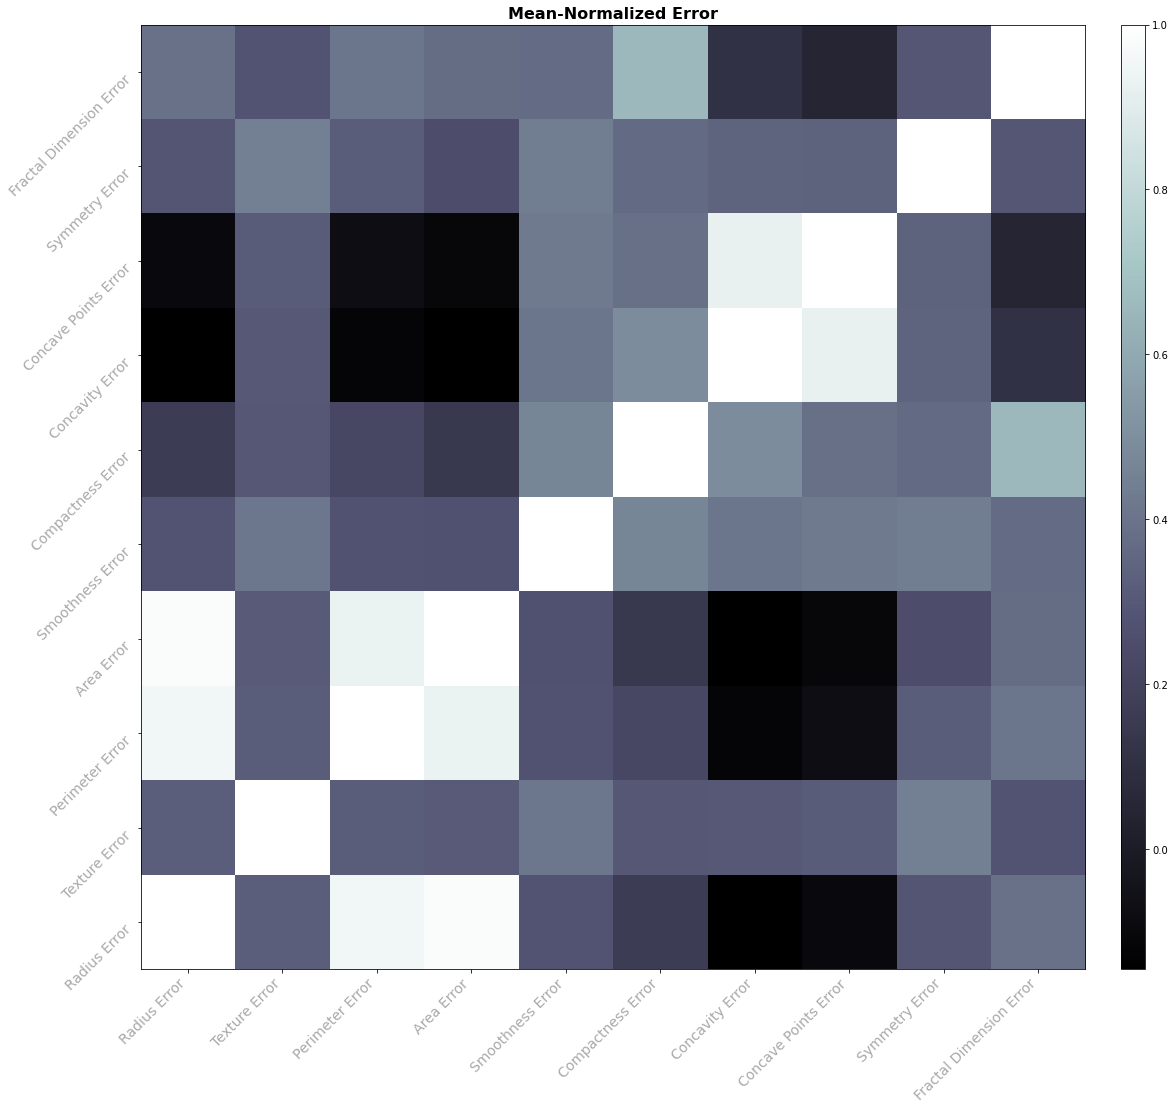

In [11]:
columns = list(filter(lambda x: x.find("error") != -1, cancer_ds.data.columns))
filtered_df = cancer_ds.data.copy()
mean_columns = [x.replace("error", "mean") for x in columns]
for w, m in zip(columns, filtered_df):
    filtered_df[w] /= filtered_df[m]
filtered_df = filtered_df.filter(items=columns, axis=1)
corr_mat = filtered_df.corr()

_ticks = np.arange(corr_mat.shape[0])
_labels = [name.title() for name in columns]

fig = plt.figure(figsize=(18., 18.))
#
plt.title("Mean-Normalized Error", fontsize=16, fontweight="bold")
im = plt.imshow(corr_mat, cmap="bone", origin="lower")
plt.xticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.yticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="2.5%", pad=0.5)
plt.colorbar(im, cax=cax)
#
plt.show()

<br><br><br>

# Classification

In [12]:
X = cancer_ds.data.to_numpy() #filtered_mean_df.to_numpy()
y = cancer_ds.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=6, 
    min_samples_split=5, 
    min_samples_leaf=3, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)

## Train Set Performance:

In [14]:
pred_y = rf_classifier.predict(X_train)
conf_mat = confusion_matrix(y_train, pred_y)
print(f"Train set confusion matrix:\n{conf_mat}")

Train set confusion matrix:
[[141   4]
 [  0 236]]


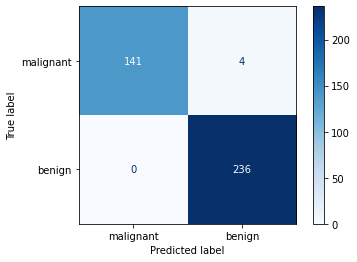

In [15]:
plot_confusion_matrix(
    rf_classifier, X_train, y_train, 
    normalize=None, display_labels=cancer_ds.target_names, cmap="Blues")

## Test Set Performance:

In [16]:
pred_y = rf_classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, pred_y)
print(f"Test set confusion matrix:\n{conf_mat}")

Test set confusion matrix:
[[ 63   4]
 [  2 119]]


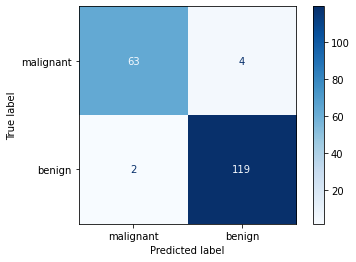

In [17]:
plot_confusion_matrix(
    rf_classifier, X_test, y_test, 
    normalize=None, display_labels=cancer_ds.target_names, cmap="Blues")

<br><br><br>

# Classification using DNN

In [18]:
X = cancer_ds.data.to_numpy() # Using all of the data:
y = cancer_ds.target

# Normalize X:
X = X - np.mean(X, axis=0)[np.newaxis, :]
X = X / np.std(X, axis=0)[np.newaxis, :]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Construct a Model

In [19]:
inputs = tf.keras.Input(shape=(30,), name="features")
x = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(16, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax", name="predictions")(x)

classfier_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model")

classfier_model.summary()

Model: "classifier_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
predictions (Dense)          (None, 2)                 34        
Total params: 3,058
Trainable params: 3,058
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name="cross_entropy")
metric = tf.keras.metrics.SparseCategoricalAccuracy(name="acuracy")

classfier_model.compile(
    optimizer=optimizer, loss=loss, metrics=[metric])

In [21]:
classfier_model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=10,
    shuffle=True)

Epoch 1/10
48/48 [==============================] - 0s 664us/step - loss: 0.7013 - acuracy: 0.6102
Epoch 2/10
48/48 [==============================] - 0s 748us/step - loss: 0.1756 - acuracy: 0.9722
Epoch 3/10
48/48 [==============================] - 0s 653us/step - loss: 0.1209 - acuracy: 0.9673
Epoch 4/10
48/48 [==============================] - 0s 736us/step - loss: 0.0872 - acuracy: 0.9775
Epoch 5/10
48/48 [==============================] - 0s 774us/step - loss: 0.0562 - acuracy: 0.9850
Epoch 6/10
48/48 [==============================] - 0s 734us/step - loss: 0.0524 - acuracy: 0.9862
Epoch 7/10
48/48 [==============================] - 0s 711us/step - loss: 0.0510 - acuracy: 0.9857
Epoch 8/10
48/48 [==============================] - 0s 814us/step - loss: 0.0346 - acuracy: 0.9903
Epoch 9/10
48/48 [==============================] - 0s 782us/step - loss: 0.0454 - acuracy: 0.9900
Epoch 10/10
48/48 [==============================] - 0s 719us/step - loss: 0.0309 - acuracy: 0.9930


In [22]:
y_pred = np.argmax(classfier_model.predict(X_train), axis=1)
conf_mat = confusion_matrix(y_train, y_pred)
print(f"Test set confusion matrix:\n{conf_mat}")

Test set confusion matrix:
[[142   3]
 [  0 236]]


## Test Set Evaluation:

In [23]:
eval_results = classfier_model.evaluate(X_test, y_test, return_dict=True)

print("Test Set Evaluation Results: ")
for name, val in eval_results.items():
    print(f"{name:16} {round(float(val), 3)}")

6/6 [==============================] - 0s 699us/step - loss: 0.0724 - acuracy: 0.9734
Test Set Evaluation Results: 
loss             0.072
acuracy          0.973


In [24]:
y_pred = np.argmax(classfier_model.predict(X_test), axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Test set confusion matrix:\n{conf_mat}")

Test set confusion matrix:
[[ 65   2]
 [  3 118]]
